### Employee Turnover Analytics

In [60]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
data_raw = pd.read_csv('HR_comma_sep.csv')

In [62]:
data_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [63]:
data_raw.isna().sum()
num_cols = data_raw.select_dtypes(exclude='O')
cat_cols = data_raw.select_dtypes(include='O')

### Heatmap

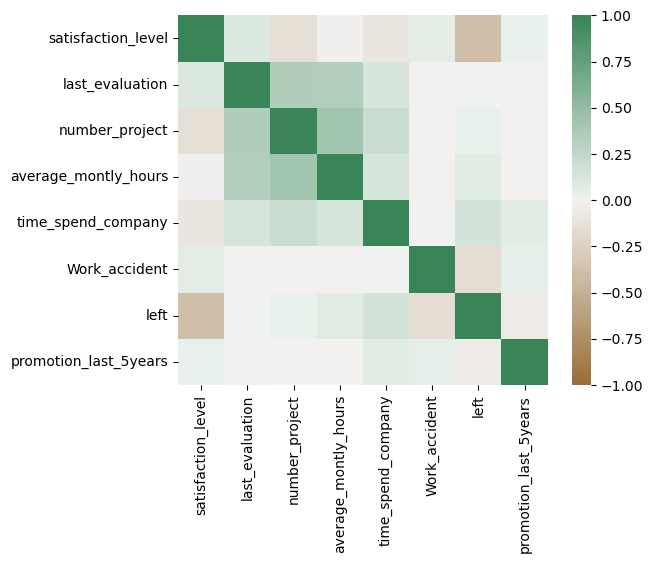

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data_raw.drop(columns = ['sales', 'salary', ]).corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

### Distribution Plot

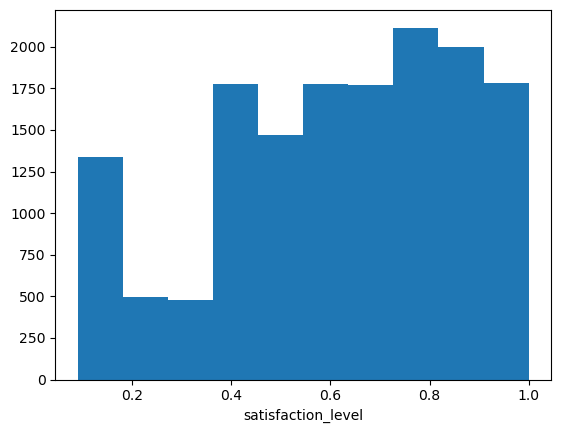

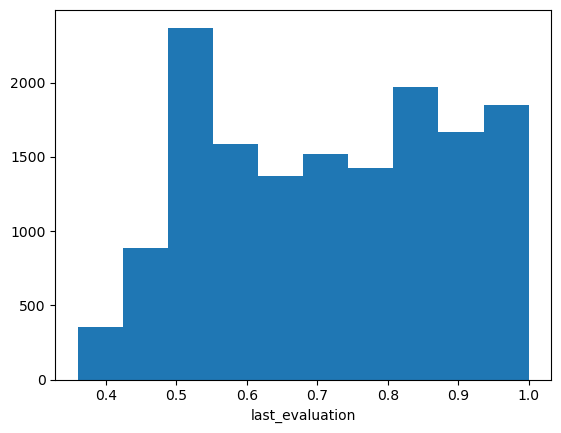

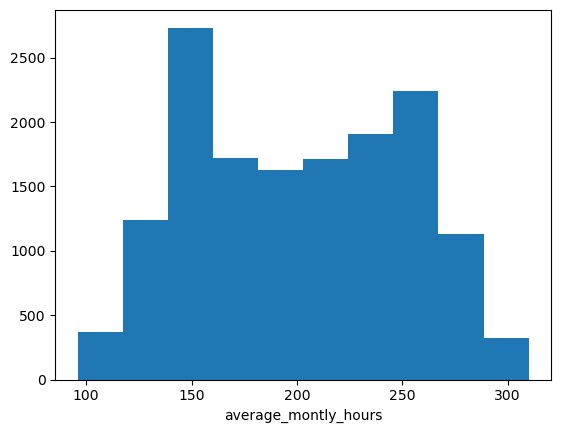

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data_raw.satisfaction_level)
plt.xlabel('satisfaction_level')
plt.show()

plt.hist(data_raw.last_evaluation)
plt.xlabel('last_evaluation')
plt.show()

plt.hist(data_raw.average_montly_hours)
plt.xlabel('average_montly_hours')
plt.show()

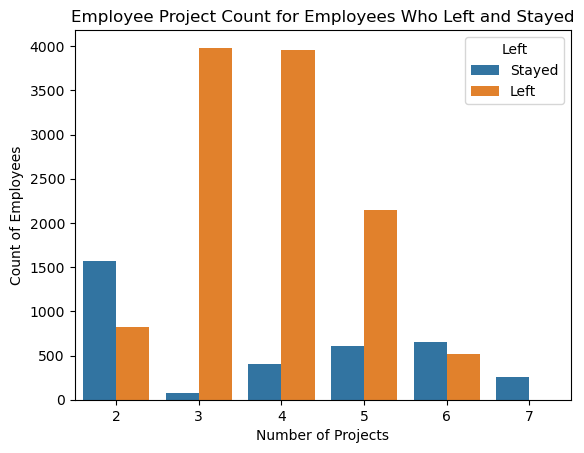

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
data_raw['left'] = data_raw['left'].astype('str')
sns.countplot(data_raw, x='number_project', hue='left')
plt.title('Employee Project Count for Employees Who Left and Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

### Inference -> Higher the number of projects handled, higher the chance that people leave the organization. 

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()

In [68]:
cols = ['satisfaction_level', 'last_evaluation']

In [69]:
data_raw['left'] 

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: object

In [70]:
data_people_left = data_raw[data_raw['left'] == '1']
data_for_cluster = data_people_left[cols]

In [71]:
data_for_cluster

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [72]:
n_clusters = 3
kmn = KMeans(n_clusters=n_clusters)

In [73]:
data_for_cluster_std = ss.fit_transform(data_for_cluster)
indices = kmn.fit_predict(data_for_cluster_std)

C:\Users\sreenathk\AppData\Local\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [74]:
labels = kmn.labels_

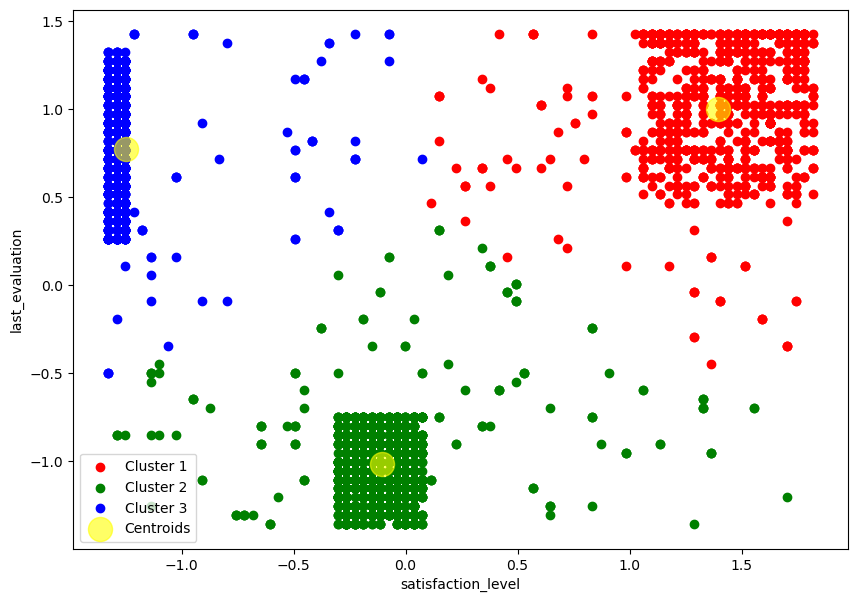

In [75]:
# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Plot each cluster with a different color
colors = ['r', 'g', 'b']
for i in range(n_clusters):
    ax.scatter(data_for_cluster_std[indices == i, 0], data_for_cluster_std[indices == i, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centers
centers = kmn.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.6, label='Centroids')

ax.set_xlabel('satisfaction_level')
ax.set_ylabel('last_evaluation')

ax.legend()
plt.show()

(array([ 965.,    0.,    0.,    0.,    0., 1667.,    0.,    0.,    0.,
         939.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

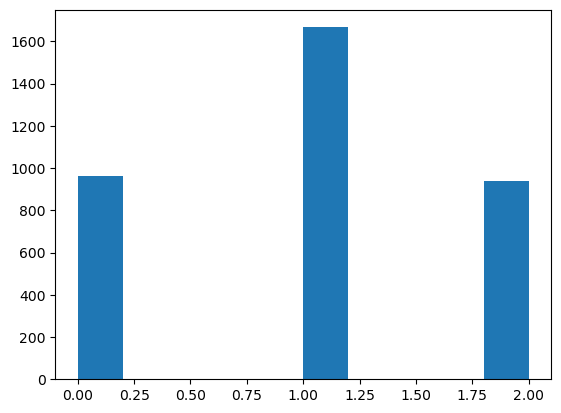

In [76]:
plt.hist(indices)

### Interpretation -> People with low ratings are with moderate satisfaction levels may leave the company. People with low satisfaction even with high evaluation are likely to leave. People with high satisfaction and high evaluation are also likely to leave.

### 4.	Handle the left Class Imbalance using the SMOTE technique.

### 5.	Perform 5-fold cross-validation model training and evaluate performance.

In [191]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [192]:
#Create all the processing instances
skf = StratifiedKFold(n_splits=5)
ss = StandardScaler()
logR_mdl = SGDClassifier(loss='log_loss')

In [193]:
# data_raw.left = data_raw.left.astype('int')

In [194]:
type(data_raw.left[0])

str

In [195]:
num_cols = data_raw.select_dtypes(exclude='O').columns
cat_cols = data_raw.select_dtypes(include='O').columns
cat_cols = [cols for cols in cat_cols if cols != 'left']
num_cols = [cols for cols in num_cols if cols != 'left']

In [196]:

num_pipeline = Pipeline([('scaler',StandardScaler())])
cat_pipeline = Pipeline([('oe', OneHotEncoder())])

preprocessing = ColumnTransformer([('num_ppln', num_pipeline, num_cols), ('cat_ppln', cat_pipeline, cat_cols)])
master_pipeline = Pipeline([('preprocessing', preprocessing), ('model', logR_mdl)])

In [197]:
X_train, X_test = train_test_split(data_raw, test_size = 0.3, random_state=123)

In [198]:
gbm_param = {
    'model__penalty':['l2', 'l1', 'elasticnet'],
    'model__alpha' : [0.01, 1, 10, 100, 1000],
    'model__l1_ratio': [0, 1, 0.5, 0.2, 0.8],
    'model__learning_rate' : ['constant', 'adaptive'],
    'model__eta0' :[0.001, 0.01, 0.1, 0.02, 0.8, 0.08, 1, 10, 100]
}

In [199]:
logisticReg_gscv = GridSearchCV(estimator=master_pipeline, scoring='neg_mean_squared_error', param_grid=gbm_param, n_jobs=-1, refit=True)

In [200]:
logisticReg_gscv.fit(X_train, X_train.left.astype('int'))

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_ppln',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_montly_hours',
                                                                          'time_spend_company',
                                                                          'Work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_ppln',
                                                                         Pipeline(steps=[('oe',
                                                                                          OneHotEncoder())]),
                                                                         ['sales',
                                                                          'salary'])])),
                                       ('model',
                                        SGDClassifier(loss='log_loss'))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 1, 10, 100, 1000],
                         'model__eta0': [0.001, 0.01, 0.1, 0.02, 0.8, 0.08, 1,
                                         10, 100],
                         'model__l1_ratio': [0, 1, 0.5, 0.2, 0.8],
                         'model__learning_rate': ['constant', 'adaptive'],
                         'model__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [ ]:
pd.DataFrame(logisticReg_gscv.cv_results_)

In [206]:
logisticReg_gscv.best_params_

{'model__alpha': 0.01,
 'model__eta0': 0.08,
 'model__l1_ratio': 1,
 'model__learning_rate': 'constant',
 'model__penalty': 'l1'}

In [207]:
print(classification_report(X_test.left.astype('int'), logisticReg_gscv.predict(X_test.drop(columns=['left']))))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3429
           1       0.49      0.32      0.39      1071

    accuracy                           0.76      4500
   macro avg       0.65      0.61      0.62      4500
weighted avg       0.73      0.76      0.74      4500



In [208]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [209]:
param_rf = {'model__n_estimators':  np.arange(5, 20),
           'model__criterion': ['gini', 'entropy'],
           'model__min_samples_split': [30, 40, 50, 60],
           'model__min_samples_leaf': [20, 25, 30, 35],
           'model__max_features': ['sqrt', 'log2', 0.2, 0.45, 0.7]}

In [210]:
num_pipeline_rf = Pipeline([('scaler',StandardScaler())])
cat_pipeline_rf = Pipeline([('oe', OneHotEncoder())])

rf_mdl = RandomForestClassifier()

preprocessing_rf = ColumnTransformer([('num_ppln', num_pipeline_rf, num_cols), ('cat_ppln', cat_pipeline_rf, cat_cols)])
master_pipeline_rf = Pipeline([('preprocessing', preprocessing_rf), ('model', rf_mdl)])


In [211]:
rf_gscv = GridSearchCV(estimator=master_pipeline_rf, scoring='neg_mean_squared_error', param_grid=param_rf, n_jobs=-1, refit=True)

In [212]:
rf_gscv

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_ppln',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_montly_hours',
                                                                          'time_spend_company',
                                                                          'Work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_ppln',
                                                                         Pipeline(steps=[('oe',
                                                                                          OneHotEncoder())]),
                                                                         ['sales',
                                                                          'salary'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_features': ['sqrt', 'log2', 0.2, 0.45,
                                                 0.7],
                         'model__min_samples_leaf': [20, 25, 30, 35],
                         'model__min_samples_split': [30, 40, 50, 60],
                         'model__n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             scoring='neg_mean_squared_error')

In [213]:
rf_gscv.fit(X_train, X_train.left.astype('int'))

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_ppln',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_montly_hours',
                                                                          'time_spend_company',
                                                                          'Work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_ppln',
                                                                         Pipeline(steps=[('oe',
                                                                                          OneHotEncoder())]),
                                                                         ['sales',
                                                                          'salary'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_features': ['sqrt', 'log2', 0.2, 0.45,
                                                 0.7],
                         'model__min_samples_leaf': [20, 25, 30, 35],
                         'model__min_samples_split': [30, 40, 50, 60],
                         'model__n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             scoring='neg_mean_squared_error')

In [214]:
print(classification_report(X_test.left.astype('int'), rf_gscv.predict(X_test.drop(columns=['left']))))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3429
           1       0.97      0.90      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [217]:
from xgboost import XGBClassifier
import numpy as np

In [218]:
param_xgb = {
    'model__n_estimators': [40,50,60],
    'model__max_depth':[4,6,8],
    'model__learning_rate':[.4,.2,.5,.8],
    'model__colsample_bytree':[.01,.02,.03,.4,.5,.8]
}

In [219]:
num_pipeline_xgb = Pipeline([('scaler',StandardScaler())])
cat_pipeline_xgb = Pipeline([('oe', OneHotEncoder())])

xgb_mdl = XGBClassifier()

preprocessing_xgb = ColumnTransformer([('num_ppln', num_pipeline_xgb, num_cols), ('cat_ppln', cat_pipeline_xgb, cat_cols)])
master_pipeline_xgb = Pipeline([('preprocessing', preprocessing_xgb), ('model', xgb_mdl)])

In [220]:
xgb_gscv = GridSearchCV(estimator=master_pipeline_xgb, scoring='neg_mean_squared_error', param_grid=param_xgb, n_jobs=-1, refit=True)

In [183]:
xgb_gscv

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_ppln',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_montly_hours',
                                                                          'time_spend_company',
                                                                          'Work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_ppln',
                                                                         Pipeline(steps=[('oe',
                                                                                          OneHotEncoder())]),
                                                                         ['sales'...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.01, 0.02, 0.03, 0.4, 0.5,
                                                     0.8],
                         'model__learning_rate': [0.4, 0.2, 0.5, 0.8],
                         'model__max_depth': [4, 6, 8],
                         'model__n_estimators': [40, 50, 60]},
             scoring='neg_mean_squared_error')

In [221]:
xgb_gscv.fit(X_train, X_train.left.astype('int'))

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_ppln',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_montly_hours',
                                                                          'time_spend_company',
                                                                          'Work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_ppln',
                                                                         Pipeline(steps=[('oe',
                                                                                          OneHotEncoder())]),
                                                                         ['sales'...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.01, 0.02, 0.03, 0.4, 0.5,
                                                     0.8],
                         'model__learning_rate': [0.4, 0.2, 0.5, 0.8],
                         'model__max_depth': [4, 6, 8],
                         'model__n_estimators': [40, 50, 60]},
             scoring='neg_mean_squared_error')

In [222]:
print(classification_report(X_test.left.astype('int'), xgb_gscv.predict(X_test.drop(columns=['left']))))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



### 6.	Identify the best model and justify the evaluation metrics used.

6.1.	Find the ROC/AUC for each model and plot the ROC curve

In [241]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [237]:
print("Logistic Regression roc_auc_score: " + str(roc_auc_score(X_test.left.astype('int'), logisticReg_gscv.predict(X_test.drop(columns=['left'])))))


Logistic Regression roc_auc_score: 0.6080171351130128


In [254]:
print("Logistic Regression Confusion Matrix: \n" + str((confusion_matrix(X_test.left.astype('int'), logisticReg_gscv.predict(X_test.drop(columns=['left'])), normalize='true'))))

Logistic Regression Confusion Matrix: 
[[0.89297171 0.10702829]
 [0.67693744 0.32306256]]


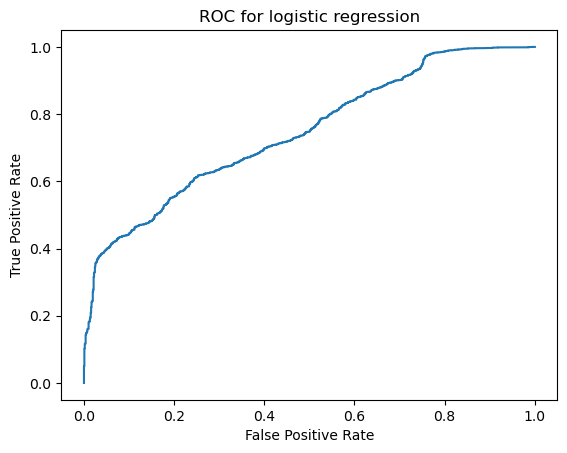

In [232]:
fpr, tpr, thresholds = roc_curve(X_test.left.astype('int'), logisticReg_gscv.predict_proba(X_test)[:,0], pos_label = 0)
plt.plot(fpr, tpr)
plt.title('ROC for logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [238]:
print("Random Forest roc_auc_score: " + str(roc_auc_score(X_test.left.astype('int'), rf_gscv.predict(X_test.drop(columns=['left'])))))

Random Forest roc_auc_score: 0.9469269772650968


In [252]:
print("Random Forest Confusion Matrix: \n" + str((confusion_matrix(X_test.left.astype('int'), rf_gscv.predict(X_test.drop(columns=['left'])), normalize='true'))))

Random Forest Confusion Matrix: 
[[0.99095946 0.00904054]
 [0.09710551 0.90289449]]


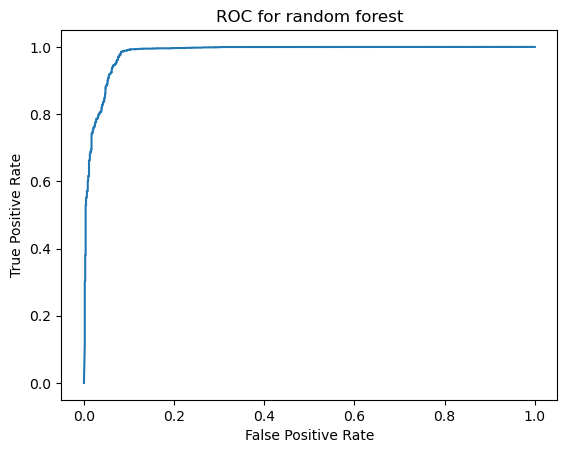

In [248]:
fpr, tpr, thresholds = roc_curve(X_test.left.astype('int'), rf_gscv.predict_proba(X_test)[:,0], pos_label = 0)
plt.plot(fpr, tpr)
plt.title('ROC for random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [240]:
print("XGBoost roc_auc_score: " + str(roc_auc_score(X_test.left.astype('int'), xgb_gscv.predict(X_test.drop(columns=['left'])))))

XGBoost roc_auc_score: 0.9828734643463685


In [257]:
print("Random Forest Confusion Matrix: \n" + str((confusion_matrix(X_test.left.astype('int'), xgb_gscv.predict(X_test.drop(columns=['left'])), normalize='true'))))

Random Forest Confusion Matrix: 
[[0.99562555 0.00437445]
 [0.02987862 0.97012138]]


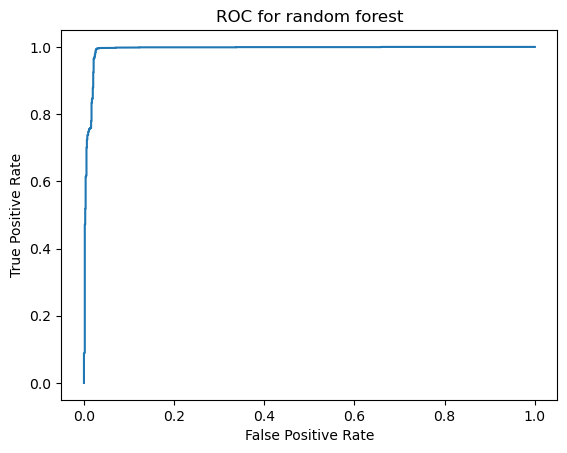

In [236]:
fpr, tpr, thresholds = roc_curve(X_test.left.astype('int'), xgb_gscv.predict_proba(X_test)[:,0], pos_label = 0)
plt.plot(fpr, tpr)
plt.title('ROC for random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()